In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Load DataSet

In [4]:
data = pd.read_csv('train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.shape

(8522, 12)

# Handling Missing Values

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data.duplicated().any()

False

In [9]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8517    20.750
8518     6.865
8519     8.380
8520    10.600
8521     7.210
Name: Item_Weight, Length: 8522, dtype: float64

In [10]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8517     Small
8518      High
8519       NaN
8520     Small
8521    Medium
Name: Outlet_Size, Length: 8522, dtype: object

# Univariate Imputation

In [12]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [13]:
print(mean_weight, median_weight)

12.85737002408273 12.6


In [14]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [15]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [16]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.56420857884636
Item Weight variance after mean imputation 17.861774926592826
Item Weight variance after median imputation 17.87119536987603


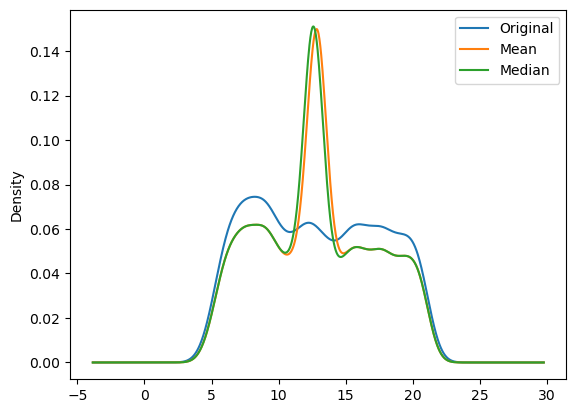

In [17]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

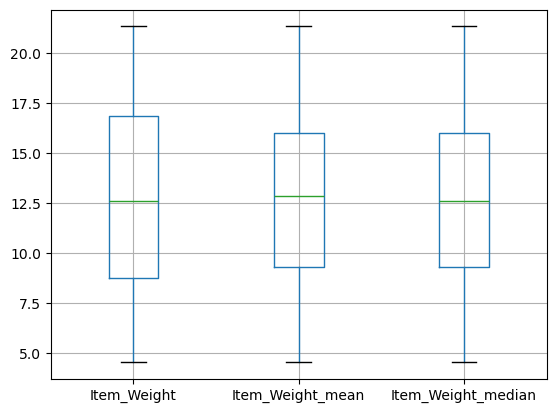

In [18]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [19]:
data['Item_Weight_Interpolate'] = data['Item_Weight'].interpolate(method='linear')

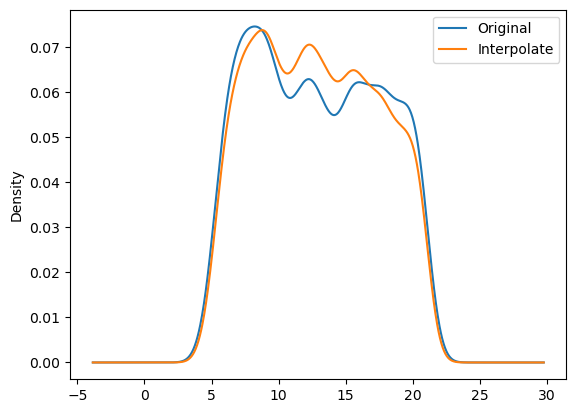

In [20]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_Interpolate'].plot(kind = "kde",label = "Interpolate")

plt.legend()
plt.show()

# Multivariate Imputation

In [22]:
from sklearn.impute import KNNImputer

In [23]:
knn = KNNImputer(n_neighbors=10, weights='distance')

In [24]:
data['knn_imputer'] = knn.fit_transform(data[['Item_Weight']]).ravel()

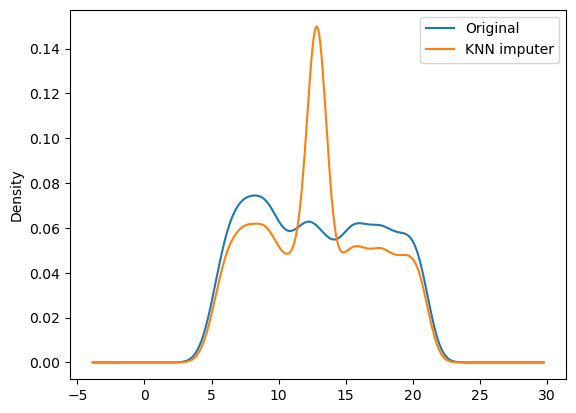

In [25]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [26]:
data = data.drop(['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median', 'knn_imputer'], axis=1)

In [27]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [28]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_Interpolate         0
dtype: int64

## Outlet_Size

In [30]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2387
High       932
Name: count, dtype: int64

In [31]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5576
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [32]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [33]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8517    False
8518    False
8519     True
8520    False
8521    False
Name: Outlet_Size, Length: 8522, dtype: bool

In [34]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [35]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_Interpolate      0
dtype: int64

## Item_Fat_Content

In [37]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5088
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [38]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})

In [39]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5516
Regular    3006
Name: count, dtype: int64

## Item_VIsibility

In [41]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.107037      2
0.061271      2
0.046825      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.145221      1
Name: count, Length: 7879, dtype: int64

In [42]:
data['Item_Visibility_interpolate'] = data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [43]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.072655    2
0.058121    2
0.013952    2
0.079806    2
           ..
0.099189    1
0.076866    1
0.014116    1
0.083060    1
0.145221    1
Name: count, Length: 8404, dtype: int64

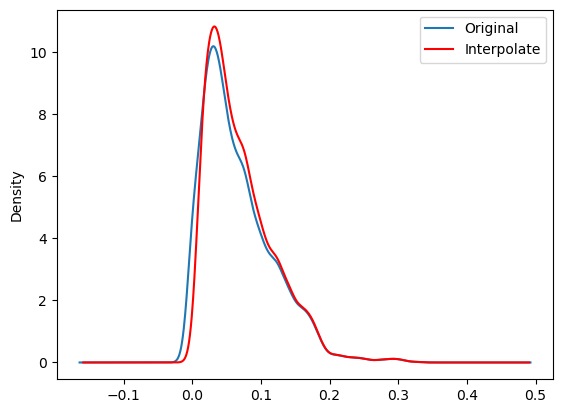

In [44]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [45]:
data = data.drop('Item_Visibility', axis=1)

In [46]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [47]:
data.shape

(8522, 12)

## Item_Type

In [49]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               444
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

## Item_Identifier

In [51]:
data['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDE52     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [52]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [53]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     798
Name: count, dtype: int64

## Outlet_Establishment_Year

In [55]:
import datetime as dt

In [56]:
current_year = dt.datetime.today().year

In [57]:
current_year

2024

In [58]:
data['Outlet_Age'] = current_year - data['Outlet_Establishment_Year']

In [59]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [60]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,FD,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


# Encoding Categorical Variables

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
data.dtypes

Item_Identifier                 object
Item_Fat_Content                object
Item_Type                       object
Item_MRP                       float64
Outlet_Identifier               object
Outlet_Size                     object
Outlet_Location_Type            object
Outlet_Type                     object
Item_Outlet_Sales              float64
Item_Weight_Interpolate        float64
Item_Visibility_interpolate    float64
Outlet_Age                       int64
dtype: object

In [64]:
encoder = LabelEncoder()
cols_to_encode = data.select_dtypes(include='object').columns
for cols in cols_to_encode:
    data[cols] = encoder.fit_transform(data[cols])

In [65]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
0,1,0,4,249.8092,9,1,0,1,3735.1380,9.30,0.016047,25
1,0,1,14,48.2692,3,1,2,2,443.4228,5.92,0.019278,15
2,1,0,10,141.6180,9,1,0,1,2097.2700,17.50,0.016760,25
3,1,1,6,182.0950,0,2,2,0,732.3800,19.20,0.015755,26
4,2,0,9,53.8614,1,0,2,1,994.7052,8.93,0.014751,37


# Handdling Outliers

In [67]:
data.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000
mean,1.093992,0.352734,7.225886,141.000471,4.721896,1.453532,1.113002,1.201244,2181.455027,12.830991,0.070343,26.168036
std,0.521986,0.477849,4.209597,62.274675,2.837146,0.683098,0.812716,0.796503,1706.530835,4.445284,0.049495,8.372247
min,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000,4.555000,0.003575,15.000000
25%,1.000000,0.000000,4.000000,93.844250,2.000000,1.000000,0.000000,1.000000,834.913200,9.000000,0.032396,20.000000
50%,1.000000,0.000000,6.000000,143.014100,5.000000,2.000000,1.000000,1.000000,1794.331000,12.600000,0.058184,25.000000
75%,1.000000,1.000000,10.000000,185.652250,7.000000,2.000000,2.000000,1.000000,3101.296400,16.600000,0.097111,37.000000
max,2.000000,1.000000,15.000000,266.888400,9.000000,2.000000,2.000000,3.000000,13086.964800,21.350000,0.328391,39.000000


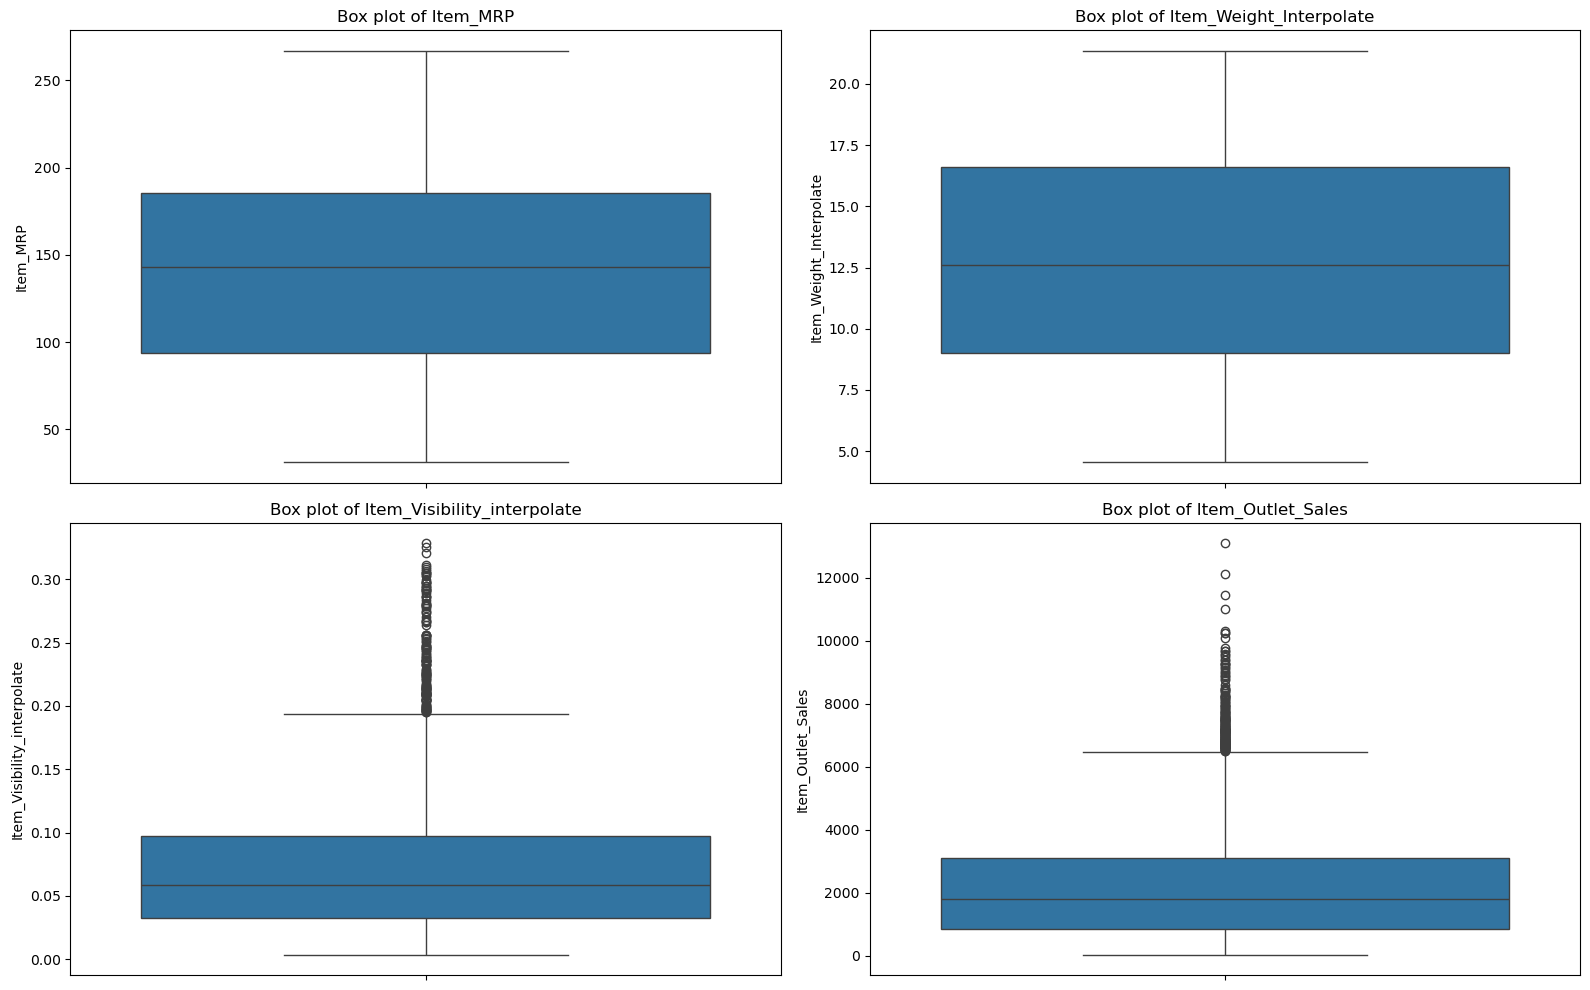

In [68]:
numerical_features = ['Item_MRP', 'Item_Weight_Interpolate', 'Item_Visibility_interpolate', 'Item_Outlet_Sales' ]

plt.figure(figsize=(16,10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data[feature])
    plt.title(f"Box plot of {feature}")

plt.tight_layout()
plt.show()

# Capping the outliers of Item_Visibility_interpolate

In [70]:
#IQR Method
q1 = data['Item_Visibility_interpolate'].quantile(0.25)
q3 = data['Item_Visibility_interpolate'].quantile(0.75)
iqr = q3 - q1

In [71]:
q1, q3, iqr

(0.032396072, 0.09711079924999992, 0.06471472724999992)

In [72]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
upper_limit, lower_limit

(0.19418289012499979, -0.06467601887499988)

In [73]:
#capping the outliers
data.loc[(data['Item_Visibility_interpolate'] > upper_limit), 'Item_Visibility_interpolate'] = upper_limit
data.loc[(data['Item_Visibility_interpolate'] < lower_limit), 'Item_Visibility_interpolate'] = lower_limit

<Axes: ylabel='Item_Visibility_interpolate'>

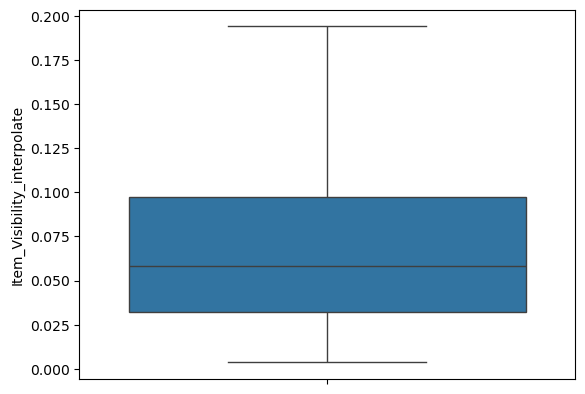

In [74]:
sns.boxplot(data['Item_Visibility_interpolate'])

# Capping the outliers of Item_Outlet_Sales

In [76]:
#IQR Method
q1 = data['Item_Outlet_Sales'].quantile(0.25)
q3 = data['Item_Outlet_Sales'].quantile(0.75)
iqr = q3 - q1

In [77]:
q1, q3, iqr

(834.9132, 3101.2964, 2266.3832)

In [78]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
upper_limit, lower_limit

(6500.8712000000005, -2564.6616000000004)

In [79]:
#capping the outliers
data.loc[(data['Item_Outlet_Sales'] > upper_limit), 'Item_Outlet_Sales'] = upper_limit
data.loc[(data['Item_Outlet_Sales'] < lower_limit), 'Item_Outlet_Sales'] = lower_limit

<Axes: ylabel='Item_Outlet_Sales'>

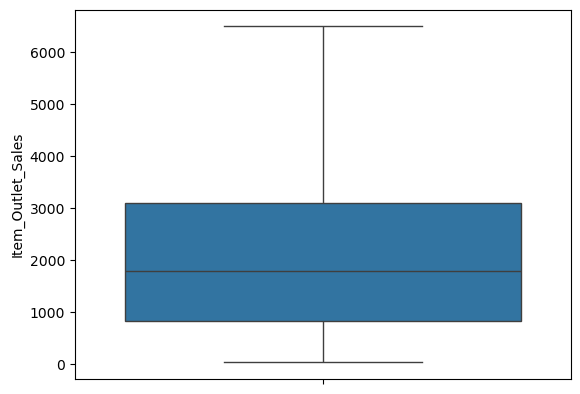

In [80]:
sns.boxplot(data['Item_Outlet_Sales'])

# Transforming Target Variable

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

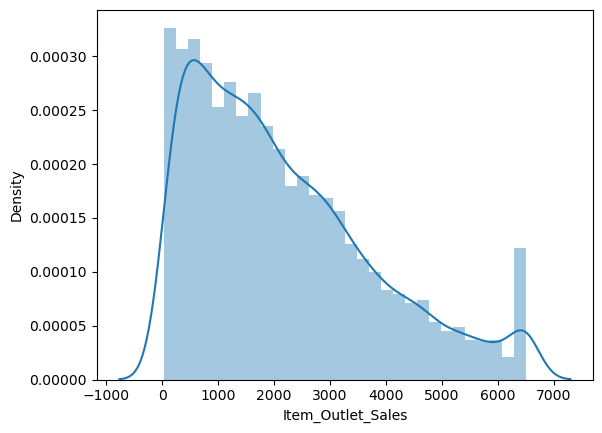

In [82]:
sns.distplot(data['Item_Outlet_Sales'])

In [83]:
from scipy.stats import skew

In [84]:
print(skew(data['Item_Outlet_Sales']))

0.8741320377322122


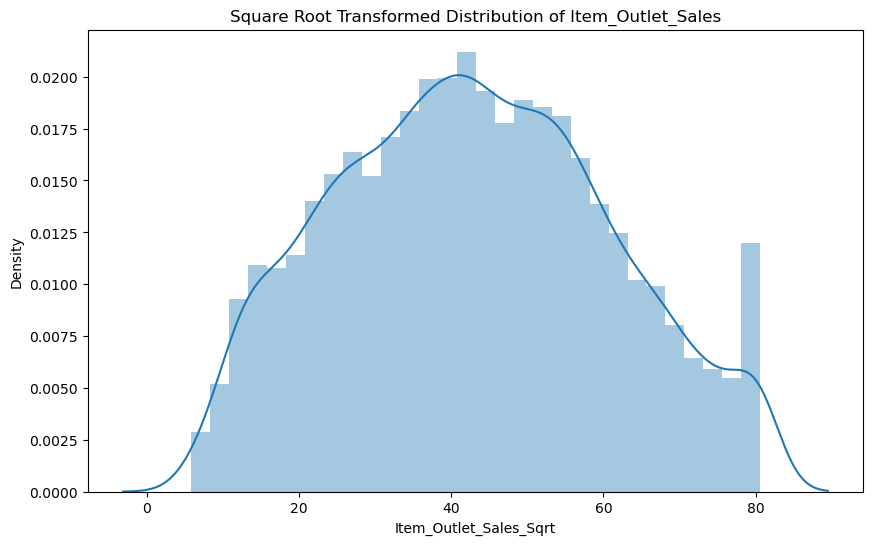

In [85]:
# Square root transformation
data['Item_Outlet_Sales_Sqrt'] = np.sqrt(data['Item_Outlet_Sales'])

plt.figure(figsize=(10, 6))
sns.distplot(data['Item_Outlet_Sales_Sqrt'], kde=True, bins=30)
plt.title('Square Root Transformed Distribution of Item_Outlet_Sales')
plt.show()


In [86]:
print(skew(data['Item_Outlet_Sales_Sqrt']))

0.12830923957406387


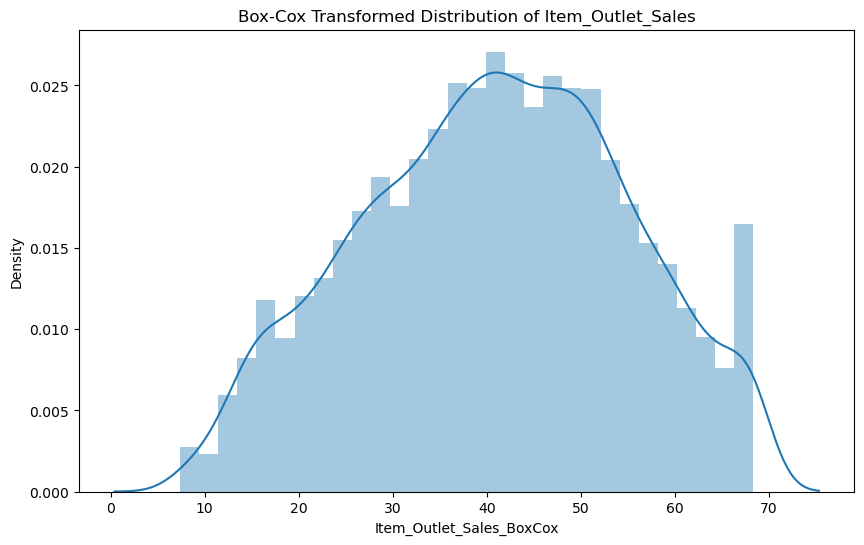

In [87]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (Box-Cox only works on positive values)
data['Item_Outlet_Sales_BoxCox'], fitted_lambda = boxcox(data['Item_Outlet_Sales'] + 1)

plt.figure(figsize=(10, 6))
sns.distplot(data['Item_Outlet_Sales_BoxCox'], kde=True, bins=30)
plt.title('Box-Cox Transformed Distribution of Item_Outlet_Sales')
plt.show()

In [88]:
print(skew(data['Item_Outlet_Sales_BoxCox']))

-0.09670878985199936


In [89]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age,Item_Outlet_Sales_Sqrt,Item_Outlet_Sales_BoxCox
0,1,0,4,249.8092,9,1,0,1,3735.1380,9.30,0.016047,25,61.115775,55.061381
1,0,1,14,48.2692,3,1,2,2,443.4228,5.92,0.019278,15,21.057607,23.402674
2,1,0,10,141.6180,9,1,0,1,2097.2700,17.50,0.016760,25,45.795961,43.874262
3,1,1,6,182.0950,0,2,2,0,732.3800,19.20,0.015755,26,27.062520,28.764866
4,2,0,9,53.8614,1,0,2,1,994.7052,8.93,0.014751,37,31.538947,32.566859


In [90]:
data = data.drop(['Item_Outlet_Sales', 'Item_Outlet_Sales_Sqrt'], axis=1)

In [91]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_Interpolate,Item_Visibility_interpolate,Outlet_Age,Item_Outlet_Sales_BoxCox
0,1,0,4,249.8092,9,1,0,1,9.30,0.016047,25,55.061381
1,0,1,14,48.2692,3,1,2,2,5.92,0.019278,15,23.402674
2,1,0,10,141.6180,9,1,0,1,17.50,0.016760,25,43.874262
3,1,1,6,182.0950,0,2,2,0,19.20,0.015755,26,28.764866
4,2,0,9,53.8614,1,0,2,1,8.93,0.014751,37,32.566859


# Feature Selection

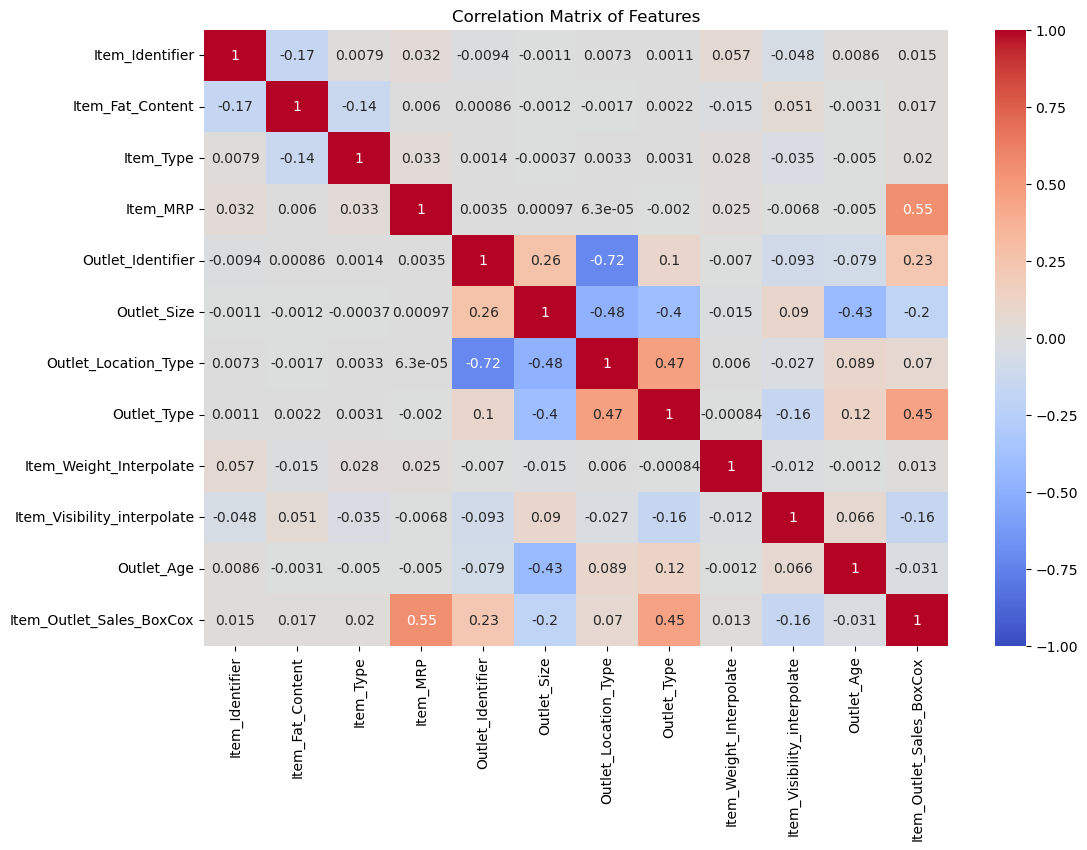

Highly Correlated Features:
 Series([], dtype: float64)
Features dropped due to multicollinearity: set()
                        Feature        Score        P-Value
3                      Item_MRP  3769.993706   0.000000e+00
7                   Outlet_Type  2194.582189   0.000000e+00
4             Outlet_Identifier   470.129505  1.608047e-101
5                   Outlet_Size   343.598014   3.126704e-75
9   Item_Visibility_interpolate   229.344067   3.825090e-51
6          Outlet_Location_Type    41.671656   1.138625e-10
10                   Outlet_Age     8.165993   4.278654e-03
2                     Item_Type     3.413879   6.468495e-02
1              Item_Fat_Content     2.368290   1.238598e-01
0               Item_Identifier     1.977578   1.596823e-01
8       Item_Weight_Interpolate     1.550703   2.130660e-01
Selected Features: ['Item_MRP' 'Outlet_Type' 'Outlet_Identifier' 'Outlet_Size'
 'Item_Visibility_interpolate' 'Outlet_Location_Type' 'Outlet_Age']


In [93]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler

X = data.drop('Item_Outlet_Sales_BoxCox', axis=1)
y = data['Item_Outlet_Sales_BoxCox']

correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

threshold = 0.8
corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]

print("Highly Correlated Features:\n", high_corr_pairs)

to_drop = set()
for feature_a, feature_b in high_corr_pairs.index:
    if feature_a not in to_drop and feature_b not in to_drop:
        to_drop.add(feature_b)  # Drop the second feature in the pair

# Drop highly correlated features from X
X_filtered = X.drop(columns=to_drop)
print(f"Features dropped due to multicollinearity: {to_drop}")

# 4. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)

# 5. Feature Selection using SelectKBest (f_regression)
k = 'all'
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the data
selector.fit(X_scaled, y)

feature_scores = pd.DataFrame({
    'Feature': X_filtered.columns,
    'Score': selector.scores_,
    'P-Value': selector.pvalues_
})


feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)

selected_features = feature_scores[feature_scores['P-Value'] < 0.05]

print(f"Selected Features: {selected_features['Feature'].values}")

X = X_filtered[selected_features['Feature'].values]


In [94]:
X.head()

,Item_MRP,Outlet_Type,Outlet_Identifier,Outlet_Size,Item_Visibility_interpolate,Outlet_Location_Type,Outlet_Age
0,249.8092,1,9,1,0.016047,0,25
1,48.2692,2,3,1,0.019278,2,15
2,141.6180,1,9,1,0.016760,0,25
3,182.0950,0,0,2,0.015755,2,26
4,53.8614,1,1,0,0.014751,2,37


In [95]:
X.shape

(8522, 7)

In [96]:
y.head()

0    55.061381
1    23.402674
2    43.874262
3    28.764866
4    32.566859
Name: Item_Outlet_Sales_BoxCox, dtype: float64

# Data Splitting and Model Selection

In [98]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='linear')
}

performance_metrics = {}

# Iterate over the models, fit them, and evaluate their performance
for model_name, model in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    performance_metrics[model_name] = {
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae
    }

performance_df = pd.DataFrame(performance_metrics).T
print(performance_df)

# Finding the best model based on R²
best_model_name = performance_df['R²'].idxmax()
best_model_score = performance_df.loc[best_model_name]

print(f"\nBest Model: {best_model_name}\nMetrics: {best_model_score}")


                                R²      RMSE       MAE
Linear Regression         0.556587  9.338754  7.491952
Ridge Regression          0.556630  9.338303  7.492188
Lasso Regression          0.553396  9.372295  7.533175
Random Forest Regressor   0.659344  8.185459  6.381879
Support Vector Regressor  0.551686  9.390220  7.485460

Best Model: Random Forest Regressor
Metrics: R²      0.659344
RMSE    8.185459
MAE     6.381879
Name: Random Forest Regressor, dtype: float64


# Hyper Parameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required at a leaf node
    'max_features': ['auto', 'sqrt'], # Number of features to consider for the best split
    'bootstrap': [True, False]        # Whether to use bootstrap samples
}

# Set up GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5,  # Cross-validation folds
                           n_jobs=-1,  # Use all available cores
                           verbose=2,
                           scoring='r2')  # Optimize for R² score

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

print("Best Parameters after tuning:")
print(grid_search.best_params_)

# Best estimator/model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf_model.predict(x_test)

# Evaluate the performance of the tuned model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters after tuning:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
R²: 0.6991096763428846
RMSE: 7.692878370829335
MAE: 6.037577577234589


In [103]:
X.head()

,Item_MRP,Outlet_Type,Outlet_Identifier,Outlet_Size,Item_Visibility_interpolate,Outlet_Location_Type,Outlet_Age
0,249.8092,1,9,1,0.016047,0,25
1,48.2692,2,3,1,0.019278,2,15
2,141.6180,1,9,1,0.016760,0,25
3,182.0950,0,0,2,0.015755,2,26
4,53.8614,1,1,0,0.014751,2,37


In [104]:
X.shape

(8522, 7)

In [105]:
input = (249.8092, 1, 9, 1,	0.016047, 0, 25)
new_input = np.asanyarray(input, dtype=float)
prediction = best_rf_model.predict(new_input.reshape(1, -1))
print(prediction)

[55.05925967]


In [106]:
input = (182.0950, 0, 0, 2,	0.015755, 2, 26)
new_input = np.asanyarray(input, dtype=float)
prediction = best_rf_model.predict(new_input.reshape(1, -1))
print(prediction)

[25.10291425]


In [107]:
y.head()

0    55.061381
1    23.402674
2    43.874262
3    28.764866
4    32.566859
Name: Item_Outlet_Sales_BoxCox, dtype: float64

In [108]:
import pickle
pickle.dump(best_rf_model, open('model.pkl', 'wb'))